In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data (adjust filepath as needed)
df = pd.read_csv('../data/train.csv')

# Identify classes in sorted order
classes = sorted(df['Class'].unique())

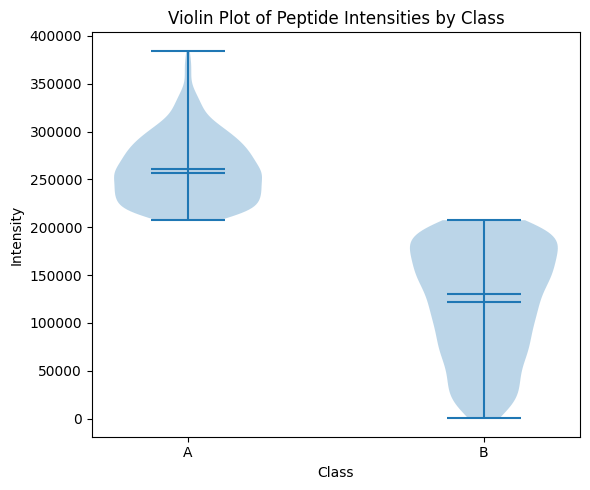

In [11]:
# 1) Violin plot: intensity distributions
plt.figure(figsize=(6, 5))
data = [df[df['Class'] == cls]['Intensity'] for cls in classes]
plt.violinplot(data, showmeans=True, showextrema=True, showmedians=True)
plt.xticks(range(1, len(classes) + 1), classes)
plt.title('Violin Plot of Peptide Intensities by Class')
plt.xlabel('Class')
plt.ylabel('Intensity')
plt.tight_layout()
plt.show()

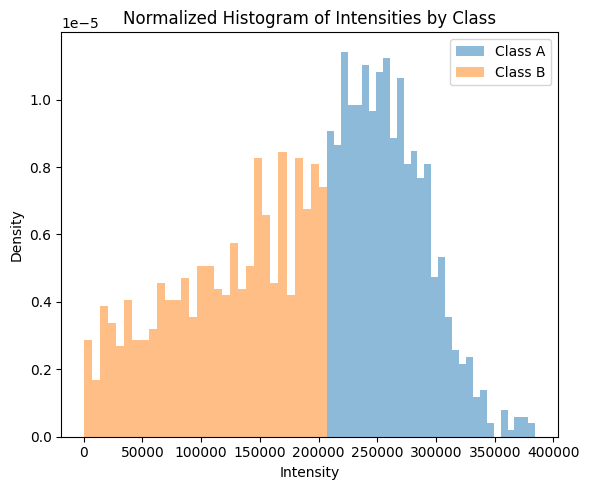

In [12]:
# 2) Overlaid histograms: normalized density
plt.figure(figsize=(6, 5))
for cls in classes:
    vals = df[df['Class'] == cls]['Intensity']
    plt.hist(vals, bins=30, alpha=0.5, density=True, label=f'Class {cls}')
plt.title('Normalized Histogram of Intensities by Class')
plt.xlabel('Intensity')
plt.ylabel('Density')
plt.legend()
plt.tight_layout()
plt.show()

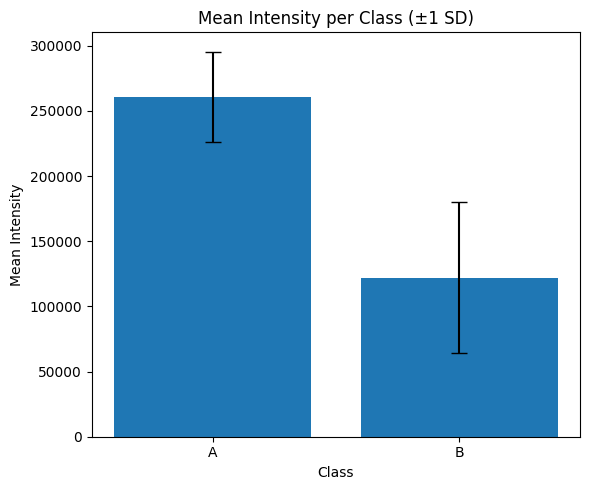

In [13]:
# 3) Mean ± SD bar chart
means = df.groupby('Class')['Intensity'].mean()
stds  = df.groupby('Class')['Intensity'].std()
plt.figure(figsize=(6, 5))
plt.bar(means.index, means.values, yerr=stds.values, capsize=6)
plt.title('Mean Intensity per Class (±1 SD)')
plt.xlabel('Class')
plt.ylabel('Mean Intensity')
plt.tight_layout()
plt.show()

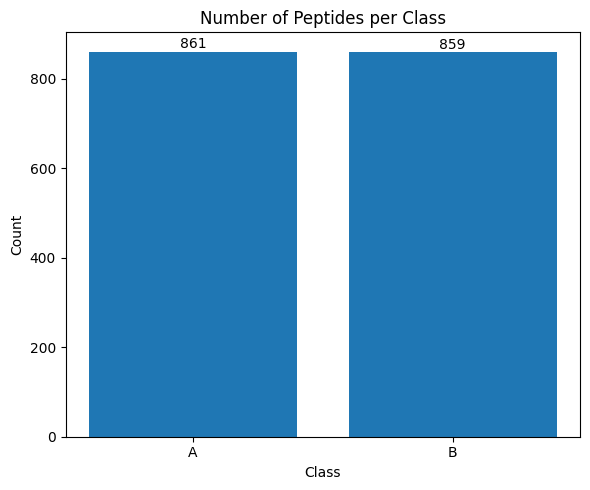

In [15]:
# 4) Class distribution bar chart
counts = df['Class'].value_counts().reindex(classes)
plt.figure(figsize=(6, 5))
bars = plt.bar(counts.index, counts.values)
for i, v in enumerate(counts.values):
    plt.text(i, v + max(counts.values)*0.01, str(v), ha='center')
plt.title('Number of Peptides per Class')
plt.xlabel('Class')
plt.ylabel('Count')
plt.tight_layout()
plt.show()